In [1]:
import numpy as np
from collections import Counter

In [2]:
class Node:
    def __init__(self,left=None, right=None, value=None, threshold=None, feature=None):
        self.left = left
        self.right = right
        self.threshold = threshold
        self.value = value
        self.feature = feature
     
    

In [37]:
class Decision_Tree:
    def __init__(self,min_sample_split=2, max_depth=100, n_features = None):
        self.min_sample_split=min_sample_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None

    def fit(self,X,y):
        self.n_features = X.shape[1]
        self.root = self.grow_tree(X,y,0)

    def grow_tree(self,X,y,depth):
        n_rows, n_cols = X.shape
        print("----------------------------------------------------------------------------------")
        print("rows:",n_rows," cols:",n_cols)
        n_labels = len(np.unique(y))
        print("No of labels:",n_labels)
        
        # Stop condition
        if (depth>=self.max_depth or n_labels == 1 or n_rows<self.min_sample_split):
            val = self.most_frequent_label(y)
            print(" Node(value = val):",val)
            return Node(value = val)

        # Best Split condition
        feature_index = np.random.choice(n_cols, self.n_features, replace = False)    # To randomly select features/cols
        print("feature_index:",feature_index)
        best_threshold, best_feature = self.best_split(X,y,feature_index)
        print("best_threshold:",best_threshold," best_feature:", best_feature)
    
        #Create child node
        left_index, right_index = self.split(X[:,best_feature],best_threshold)
        left = self.grow_tree(X[left_index,:],y[left_index],depth+1)
        print("left:",left[:11,])
        right = self.grow_tree(X[right_index,:],y[right_index],depth+1)
        print("right:",left[:11,])
        return Node(left,right,best_threshold,best_feature)

    def most_frequent_label(self,y):    # This will return the first most frequent lable from y
        count = Counter(y)
        frequency = counter.most_common(1)[0][0]
        return frequency

    def entropy(self,y):
        count = np.bincount(y)   # bincount returns the frequency of elements
        P = count/len(y)
        return (-np.sum([p*np.log(p) for p in P if p>0]))
        
    def info_gain(self,X_col,y,thr):
        parent_entropy = self.entropy(y)

        # Create Children 
        left_index, right_index = self.split(X_col,thr)

        # Returning 0 when there is only single type of label: means entropy is 0
        if len(left_index) == 0 or len(right_index) == 0:
            return 0
        
        #Calculate the Weigthed avg of Entropy of children
        n = len(y)
        w_left, w_right = len(left_index)/n, len(right_index)/n
        entro_left,entro_right = self.entropy(y[left_index]), self.entropy(y[right_index])
        child_entropy = w_left*entro_left + w_right*entro_right

        # Information gain
        return parent_entropy - child_entropy
        
    def split(self,X_col,threshold):
        # np.argwhere returns the index of elements which smaller than threshold
        print("threshold in X_col:",threshold)
        left_index = np.argwhere(X_col<=threshold).flatten()
        print("left_index:",left_index)
        right_index = np.argwhere(X_col>threshold).flatten()
        print("right_index",right_index)
        return left_index,right_index
        
    def best_split(self,X,y,feature_index):
        print("feature_index:",feature_index)
        # Setting initial info gain as -1
        best_info_gain = -1
        
        # setting initial value as none for split_index and split_threshold
        split_index= None
        split_threshold = None     

        for index in feature_index:
            print("==========================================index:", index,"===============================================")
            X_col = X[:,index]
            print("Priniting only 10 rows of X_col ", X_col[:11,])
            thres = np.unique(X_col)
            print("thres:",thres)
            
            for thr in thres:
                print("thr:",thr)
                gain = self.info_gain(X_col,y,thr)
                if gain>best_info_gain:
                    best_gain = gain
                    split_threshold = thr
                    split_index = index

        print("Best Gain:", best_info_gain)
        return split_threshold,split_index
        
    def predict(self,X):
       return np.array([self.traverse_tree(x,self.root) for x in X]) 

    def traverse_tree(self, x, node):
       print("x",x)
       if node.value is not None:
           print("node value: ",node.value)
           return node.value

       if x[node.feature]<= node.threshold:
           print("x[",x[node.feature],"] <= ",node.threshold)
           return self.traverse_tree(x,node.left)
       else:
           print("x[",x[node.feature],"] > ",node.threshold)
           return self.traverse_tree(x,node.right)

In [38]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [39]:
from sklearn import datasets
df=datasets.load_iris()
X = df.data
y = df.target

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [42]:
reg = DecisionTreeRegressor()

In [43]:
reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [44]:
y_pred = reg.predict(X_test)

In [45]:
import matplotlib.pyplot as plt 

In [46]:
from sklearn import tree

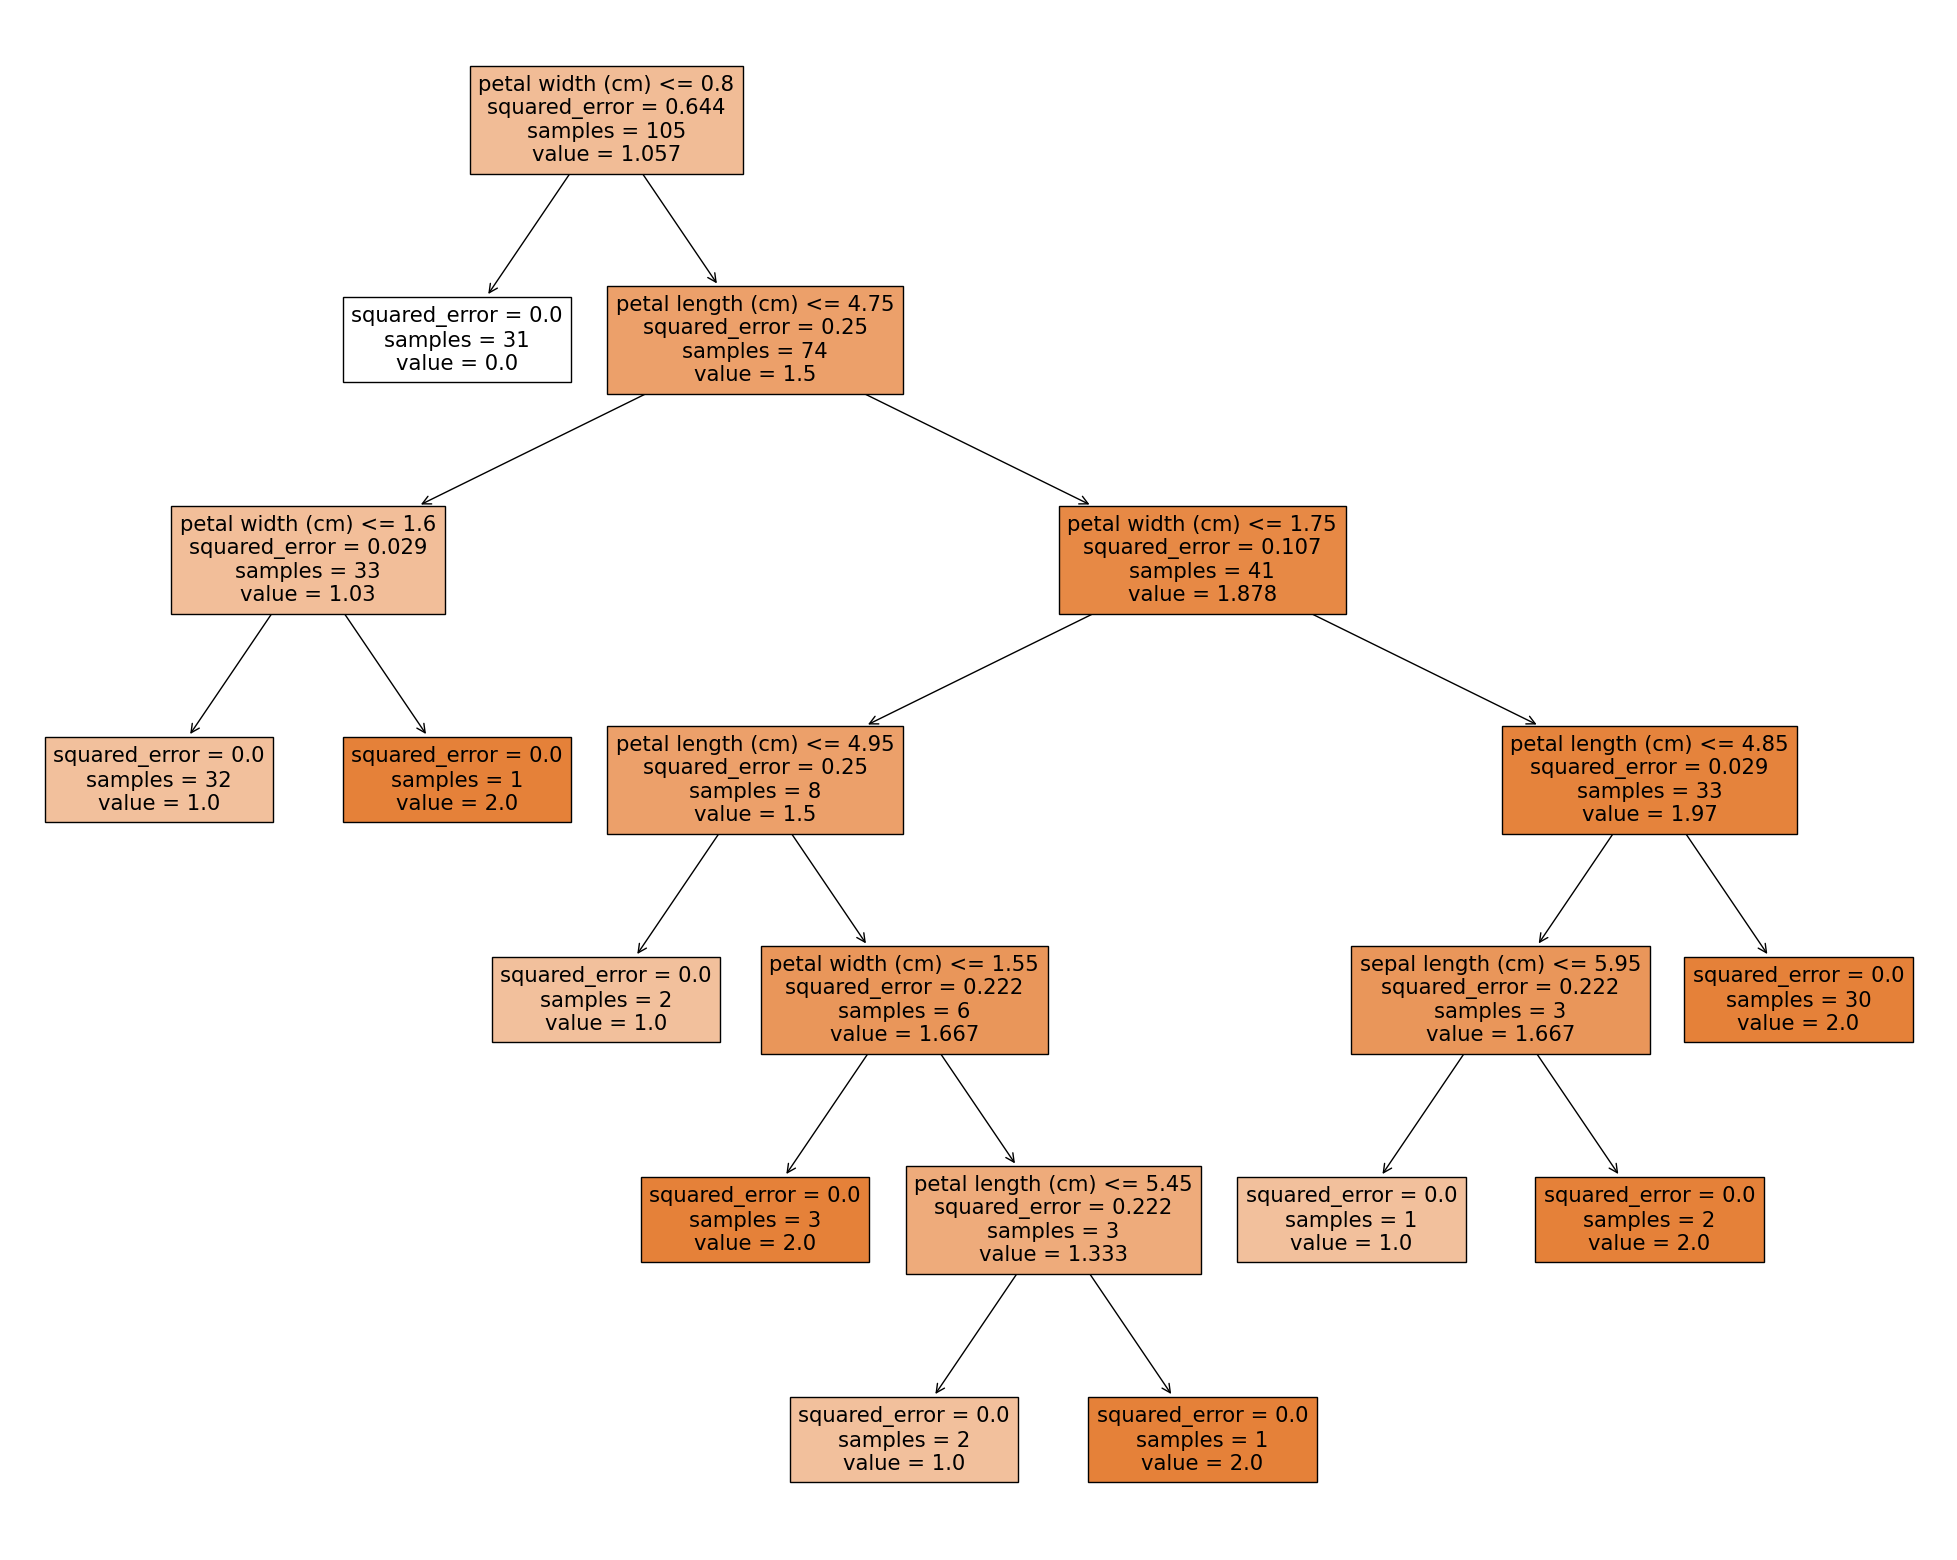

In [47]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg, 
                   feature_names=df.feature_names,  
                   class_names=df.target_names,
                   filled=True)

In [48]:
print(tree.export_text(reg))

|--- feature_3 <= 0.80
|   |--- value: [0.00]
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.75
|   |   |--- feature_3 <= 1.60
|   |   |   |--- value: [1.00]
|   |   |--- feature_3 >  1.60
|   |   |   |--- value: [2.00]
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_2 <= 4.95
|   |   |   |   |--- value: [1.00]
|   |   |   |--- feature_2 >  4.95
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- value: [2.00]
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |   |--- value: [2.00]
|   |   |--- feature_3 >  1.75
|   |   |   |--- feature_2 <= 4.85
|   |   |   |   |--- feature_0 <= 5.95
|   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- feature_0 >  5.95
|   |   |   |   |   |--- value: [2.00]
|   |   |   |--- feature_2 >  4.85
|   |   |   |   |--- value: [2.00]



In [49]:
!pip install graphviz

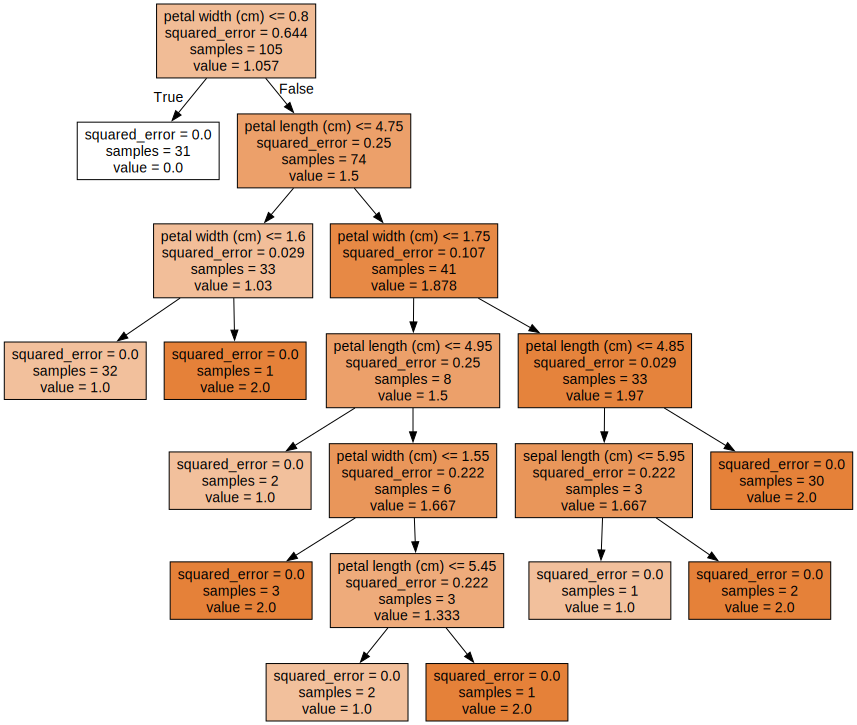

In [50]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(reg, out_file=None, 
                                feature_names=df.feature_names,  
                                class_names=df.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [51]:
D_reg = Decision_Tree()

In [52]:
D_reg.fit(X_train,y_train)

----------------------------------------------------------------------------------
rows: 105  cols: 4
No of labels: 3
feature_index: [2 3 1 0]
feature_index: [2 3 1 0]
==========================================index: 2 ===============================================
Priniting only 10 rows of X_col  [3.7 5.1 5.5 4.4 6.1 4.2 6.6 4.5 1.4 6.7 4.1]
thres: [1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.9 3.  3.3 3.5 3.7 3.8 3.9 4.  4.1 4.2 4.3
 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1
 6.3 6.6 6.7]
thr: 1.1
threshold in X_col: 1.1
left_index: [52]
right_index [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104]
th

NameError: name 'counter' is not defined